In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [60]:
df = pd.read_csv("/kaggle/input/interview-selection-dataset/Data - Base.csv")
df.shape

(21256, 52)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21256 entries, 0 to 21255
Data columns (total 52 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Name                                                                                                                                               21256 non-null  object 
 1   Age                                                                                                                                                21256 non-null  object 
 2   Gender                                                                                                                                             21256 non-null  object 
 3   Type o

# Preprocessing

In [62]:
df.isna().sum()

Name                                                                                                                                                    0
Age                                                                                                                                                     0
Gender                                                                                                                                                  0
Type of Graduation/Post Graduation                                                                                                                      0
Marital status                                                                                                                                          0
Mode of interview given by candidate?                                                                                                                   0
Pre Interview Check                                                         

In [63]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [64]:
df.head(20)

,name,age,gender,type_of_graduation/post_graduation,marital_status,mode_of_interview_given_by_candidate?,pre_interview_check,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,...,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,whether_joined_the_company_or_not
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,2,1,1.0,1.0,11,7,3,42,No
1,shreej,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,No
2,ms6744,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,3,3,3,1.0,3.0,10,9,7,52,Yes
3,aswalu,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,Yes
4,aniket,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,2,1,3,1.0,3.0,10,5,7,44,Not Joined
5,faizal,23,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Trying but Not Able to speak clearly & Fumbles...,Nervous,Guarded Confidence - Confident in some areas a...,...,1,1,2,0.0,2.0,6,3,4,26,Not Joined
6,ravatn,24,Female,B.ed(Teaching),Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,2,2,1,3.0,3.0,10,6,7,46,No
7,gornal,25,Male,M.E / M-Tech,Unmarried,Laptop,Proceed with the Interview,Trying but Not Able to speak clearly & Fumbles...,Guarded Confidence - Confident in some areas a...,Guarded Confidence - Confident in some areas a...,...,1,3,1,1.0,1.0,8,5,3,32,Joined
8,Upkarr,24,Male,B.E / B-Tech,Married,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Guarded Confidence - Confident in some areas a...,...,2,1,1,1.0,2.0,7,5,4,32,Joined
9,moizju,25,Male,B.com (Bachelor of commerce),Unmarried,Laptop,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,2,3,3,1.0,1.0,9,8,5,44,Yes


In [65]:
df.duplicated().sum()

2

In [66]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [67]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduation/post_graduation',
       'marital_status', 'mode_of_interview_given_by_candidate?',
       'pre_interview_check', 'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english.',
       'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_mo

In [68]:
df.columns = df.columns.str.strip()

In [69]:
df.rename(columns={"but,_my_child's_exam_are_going_on_now,_so_we_will_keep_the_counselling_session_after_the_exams_get_over.(time:_favourable_pitch:_counsellor_hype)": "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app.": "reply_being_in_education",
                   "mode_of_interview_given_by_candidate?" :"interview_mode"
                  }, inplace=True)
df.columns

Index(['name', 'age', 'gender', 'type_of_graduation/post_graduation',
       'marital_status', 'interview_mode', 'pre_interview_check',
       'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english.',
       'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_months)',
       'experie

In [70]:
df.iloc[:, list(range(7, 16)) + list(range(36, 47))].head(20)

,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,confidence_based_on_the_ppt_question,confidence_based_on_the_sales_scenario,structured_thinking_(in_regional_only),structured_thinking_based_on_the_ppt_question,structured_thinking(_call_pitch),regional_fluency_based_on_the_topic_given,redflags_comments_in_interview,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1
0,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the sal...,Scripted : To the point,Logical and Structured : Detailed explanation,Scripted - Product Features/Repetitive content...,Taking gaps while speaking due to lack of cont...,At least Graduated ( not 12th Pass or diploma ...,3,2,3,3,2,3,2,1,1.0,1.0
1,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the sal...,Logical and Structured : Detailed explanation,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Able to speak sentences in a clear/coherent wa...,Not Rehire (CDT have not joined byjus in sales...,3,3,3,3,3,3,3,3,3.0,3.0
2,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the sal...,Logical and Structured : Detailed explanation,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Able to speak sentences in a clear/coherent wa...,Not working currently and ready to join the R3...,2,3,2,3,3,3,3,3,1.0,3.0
3,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the sal...,Logical and Structured : Detailed explanation,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Able to speak sentences in a clear/coherent wa...,Not Rehire (CDT have not joined byjus in sales...,3,3,3,3,3,3,3,3,3.0,3.0
4,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the sal...,Scripted : To the point,Scripted : To the point,Incomplete,Able to speak sentences in a clear/coherent wa...,"Age is below 32.11, At least Graduated ( not 1...",2,3,2,3,2,2,1,3,1.0,3.0
5,Trying but Not Able to speak clearly & Fumbles...,Nervous,Guarded Confidence - Confident in some areas a...,Nervous,Guarded Confidence - Confident in some areas a...,Incomplete : Not able to initiate the conversa...,Incomplete : Not able to initiate the conversa...,Incomplete,Trying but Not Able to speak clearly & Fumbles...,"Age is below 32.11, At least Graduated ( not 1...",1,2,1,2,1,1,1,2,0.0,2.0
6,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the sal...,Scripted : To the point,Scripted : To th

In [71]:
df.drop(df.columns[8:15], axis=1, inplace=True)

In [72]:
df.head(5)

,name,age,gender,type_of_graduation/post_graduation,marital_status,interview_mode,pre_interview_check,fluency_in_english_based_on_introduction,regional_fluency_based_on_the_topic_given,regional_fluency_based_on_the_ppt_question,...,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,whether_joined_the_company_or_not
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Taking gaps while speaking due to lack of cont...,Taking gaps while speaking due to lack of cont...,...,3,2,1,1.0,1.0,11,7,3,42,No
1,shreej,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,...,3,3,3,3.0,3.0,12,9,9,60,No
2,ms6744,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Taking gaps while speaking due to lack of cont...,...,3,3,3,1.0,3.0,10,9,7,52,Yes
3,aswalu,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,...,3,3,3,3.0,3.0,12,9,9,60,Yes
4,aniket,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Able to speak sentences in a clear/coherent wa...,Taking gaps while speaking due to lack of cont...,...,2,1,3,1.0,3.0,10,5,7,44,Not Joined


In [73]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduation/post_graduation',
       'marital_status', 'interview_mode', 'pre_interview_check',
       'fluency_in_english_based_on_introduction',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english.',
       'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_months)',
       'experienced_candidate_(nature_of_work)', 'what_was_the_type_of_role?',
       'how_many_slides_candidate_have_submitted_in_ppt?',
       'call-pitch_elements_used_during_the_call_sales_scenario',
       'father_reply', 'let_me_discuss_it_with_my_child',
       'reply_being_in_education', 'role_acceptance', 'interview_verdict',
       'candidate_is_

In [74]:
df.iloc[:, list(range(5, 20))]

,interview_mode,pre_interview_check,fluency_in_english_based_on_introduction,regional_fluency_based_on_the_topic_given,regional_fluency_based_on_the_ppt_question,regional_fluency_based_on_the__sales_scenario,does_the_candidate_has_mother_tongue_influence_while_speaking_english.,has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?,candidate_status,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate_-_(experience_in_months),experienced_candidate_(nature_of_work),what_was_the_type_of_role?,how_many_slides_candidate_have_submitted_in_ppt?
0,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Taking gaps while speaking due to lack of cont...,Taking gaps while speaking due to lack of cont...,Taking gaps while speaking due to lack of cont...,No,No,Experienced in non client facing(equal to or m...,5-5.99,No,6-11.99 Months,tech,Fresher,More than 6 slides
1,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,No,No,Lateral(2021 and before with (less than 6 mont...,Fresher,No,Fresher(<6 months),Fresher(<6 months),Fresher,2 - 3 slides
2,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Taking gaps while speaking due to lack of cont...,Able to speak sentences in a clear/coherent wa...,Yes,Yes,Fresher(only 2022 grad),Fresher,Yes,Fresher(<6 months),Fresher(<6 months),Individual Contributor,5 - 6 slides
3,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,No,No,Fresher(only 2022 grad),Fresher,No,Fresher(<6 months),Fresher(<6 months),Fresher,5 - 6 slides
4,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Able to speak sentences in a clear/coherent wa...,Taking gaps while speaking due to lack of cont...,Able to speak sentences in a clear/coherent wa...,No,No,Fresher(only 2022 grad),Fresher,No,Fresher(<6 months),Fresher(<6 months),Fresher,1 slide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,No,No,Experienced in client facing(equal to or more ...,7+,Yes,36-47.99 Months,working hours,Team Handling,4 - 5 slides
21252,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,No,No,Experienced in client facing(equal to or more ...,7+,No,48+ Months,Sales numbers,Individual Contributor,More than 6 slides
21253,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,Able to speak sentences in a clear/coherent wa...,No,No,Experienced in non client facing(equal to or m...,2-2.99,No,12-17.99 Months,networking,Individual Contributor,4 - 5 slides
21254,Mobile,Rehire - Have worked with Byjus earlier,Taking gaps while speaking due to lack of cont...,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.drop(columns=['fluency_in_english_based_on_introduction',
                 'regional_fluency_based_on_the_topic_given',
                 'regional_fluency_based_on_the_ppt_question','regional_fluency_based_on_the__sales_scenario'], inplace=True)

In [76]:
df.head(5)

,name,age,gender,type_of_graduation/post_graduation,marital_status,interview_mode,pre_interview_check,does_the_candidate_has_mother_tongue_influence_while_speaking_english.,has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?,candidate_status,...,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,whether_joined_the_company_or_not
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,No,No,Experienced in non client facing(equal to or m...,...,3,2,1,1.0,1.0,11,7,3,42,No
1,shreej,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,No,No,Lateral(2021 and before with (less than 6 mont...,...,3,3,3,3.0,3.0,12,9,9,60,No
2,ms6744,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Yes,Yes,Fresher(only 2022 grad),...,3,3,3,1.0,3.0,10,9,7,52,Yes
3,aswalu,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,No,No,Fresher(only 2022 grad),...,3,3,3,3.0,3.0,12,9,9,60,Yes
4,aniket,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,No,No,Fresher(only 2022 grad),...,2,1,3,1.0,3.0,10,5,7,44,Not Joined


In [77]:
df.iloc[:, 1:19]

,age,gender,type_of_graduation/post_graduation,marital_status,interview_mode,pre_interview_check,does_the_candidate_has_mother_tongue_influence_while_speaking_english.,has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?,candidate_status,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate_-_(experience_in_months),experienced_candidate_(nature_of_work),what_was_the_type_of_role?,how_many_slides_candidate_have_submitted_in_ppt?,call-pitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child
0,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,No,No,Experienced in non client facing(equal to or m...,5-5.99,No,6-11.99 Months,tech,Fresher,More than 6 slides,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above
1,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,No,No,Lateral(2021 and before with (less than 6 mont...,Fresher,No,Fresher(<6 months),Fresher(<6 months),Fresher,2 - 3 slides,"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above
2,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Yes,Yes,Fresher(only 2022 grad),Fresher,Yes,Fresher(<6 months),Fresher(<6 months),Individual Contributor,5 - 6 slides,"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...
3,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,No,No,Fresher(only 2022 grad),Fresher,No,Fresher(<6 months),Fresher(<6 months),Fresher,5 - 6 slides,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above
4,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,No,No,Fresher(only 2022 grad),Fresher,No,Fresher(<6 months),Fresher(<6 months),Fresher,1 slide,None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21251,25,Male,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,No,No,Experienced in client facing(equal to or more ...,7+,Yes,36-47.99 Months,working hours,Team Handling,4 - 5 slides,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency by creating counse...",Decision Making: Major decision of child futur...
21252,31,Male,B.ARC,Married,Laptop,Proceed with the Interview,No,No,Experienced in client facing(equal to or more ...,7+,No,48+ Months,Sales numbers,Individual Contributor,More than 6 slides,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...
21253,26,Male,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,No,No,Experienced in non client facing(equal to or m...,2-2.99,No,12-17.99 Months,networking,Individual Contributor,4 - 5 slides,"Introduction (Self Intro,Company Name), Purpos...",Urgency using situation,Asking questions:
21254,24,Male,MBA,Unmarried,Mobile,Rehire - Have worked with Byjus earlier,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.rename(columns={'does_the_candidate_has_mother_tongue_influence_while_speaking_english':'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?	' : 'spoken_before_applying?'
                  }, inplace=True)

In [79]:
df.rename(columns={"but,_my_child's_exam_are_going_on_now,_so_we_will_keep_the_counselling_session_after_the_exams_get_over.(time:_favourable_pitch:_counsellor_hype)": "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app.": "reply_being_in_education",
                   "mode_of_interview_given_by_candidate?" :"interview_mode"
                  }, inplace=True)
df.columns

Index(['name', 'age', 'gender', 'type_of_graduation/post_graduation',
       'marital_status', 'interview_mode', 'pre_interview_check',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english.',
       'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_months)',
       'experienced_candidate_(nature_of_work)', 'what_was_the_type_of_role?',
       'how_many_slides_candidate_have_submitted_in_ppt?',
       'call-pitch_elements_used_during_the_call_sales_scenario',
       'father_reply', 'let_me_discuss_it_with_my_child',
       'reply_being_in_education', 'role_acceptance', 'interview_verdict',
       'candidate_is_willing_to_relocate',
       'role_location_to_be_given_to_the_candidate', 'comments',
       'redflags_comments_in_interview',
       'confidence_based_on_introduction_(english).1',
       'confidence_based_on_t

In [80]:
df['candidate_status'].unique()

array(['Experienced in non client facing(equal to or more than 6 months)',
       'Lateral(2021 and before with (less than 6 months) experience)',
       'Fresher(only 2022 grad)',
       'Experienced in client facing(equal to or more than 6 months)',
       nan], dtype=object)

In [81]:
df['candidate_status'].value_counts()

candidate_status
Fresher(only 2022 grad)                                             8596
Lateral(2021 and before with (less than 6 months) experience)       3644
Experienced in client facing(equal to or more than 6 months)        3431
Experienced in non client facing(equal to or more than 6 months)    3038
Name: count, dtype: int64

In [82]:
df['candidate_status'] = df['candidate_status'].fillna('Unknown')

In [83]:
df['candidate_status'].value_counts()

candidate_status
Fresher(only 2022 grad)                                             8596
Lateral(2021 and before with (less than 6 months) experience)       3644
Experienced in client facing(equal to or more than 6 months)        3431
Experienced in non client facing(equal to or more than 6 months)    3038
Unknown                                                             2545
Name: count, dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21254 entries, 0 to 21255
Data columns (total 41 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   name                                                                    21254 non-null  object 
 1   age                                                                     21254 non-null  object 
 2   gender                                                                  21254 non-null  object 
 3   type_of_graduation/post_graduation                                      21254 non-null  object 
 4   marital_status                                                          21254 non-null  object 
 5   interview_mode                                                          21254 non-null  object 
 6   pre_interview_check                                                     21254 non-n

In [85]:
df.isna().sum()

name                                                                         0
age                                                                          0
gender                                                                       0
type_of_graduation/post_graduation                                           0
marital_status                                                               0
interview_mode                                                               0
pre_interview_check                                                          0
does_the_candidate_has_mother_tongue_influence_while_speaking_english.       0
has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?       0
candidate_status                                                             0
last_fixed_ctc_(lakhs)                                                    2545
currently_employed                                                        2545
experienced_candidate_-_(experience_in_months)      

In [86]:
# cat_cols = ['Last Fixed CTC (lakhs)', 'Currently Employed', 'Experienced Candidate (Nature of work)', 
#             'What was the type of Role?', 'Role acceptance', 'Interview Verdict', 
#             'Candidate is willing to relocate', 'Role Location to be given to the candidate']

# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])  # Filling with the most frequent value


In [87]:
# import numpy as np

# experience_mapping = {
#     "Fresher(<6 months)": 0,
#     "6-11.99 Months": 9,
#     "12-17.99 Months": 15,
#     "18-23.99 Months": 21,
#     "24-35.99 Months": 30,
#     "36-47.99 Months": 42,
#     "48+ Months": 48}

# df['Experienced candidate - (Experience in months)'] = df['Experienced candidate - (Experience in months)'].replace(experience_mapping)
# df['Experienced candidate - (Experience in months)'] = pd.to_numeric(df['Experienced candidate - (Experience in months)'], errors='coerce')
# df['Experienced candidate - (Experience in months)'] = df['Experienced candidate - (Experience in months)'].fillna(df['Experienced candidate - (Experience in months)'].median())

In [88]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduation/post_graduation',
       'marital_status', 'interview_mode', 'pre_interview_check',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english.',
       'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_months)',
       'experienced_candidate_(nature_of_work)', 'what_was_the_type_of_role?',
       'how_many_slides_candidate_have_submitted_in_ppt?',
       'call-pitch_elements_used_during_the_call_sales_scenario',
       'father_reply', 'let_me_discuss_it_with_my_child',
       'reply_being_in_education', 'role_acceptance', 'interview_verdict',
       'candidate_is_willing_to_relocate',
       'role_location_to_be_given_to_the_candidate', 'comments',
       'redflags_comments_in_interview',
       'confidence_based_on_introduction_(english).1',
       'confidence_based_on_t

# Scaling and others

In [89]:
df.rename(columns={'whether_joined_the_company_or_not': 'joined_or_not'}, inplace=True)

In [90]:
df['joined_or_not'].unique()

array(['No', 'Yes', 'Not Joined', 'Joined'], dtype=object)

In [127]:
df['joined_or_not'].value_counts()

joined_or_not
No            12309
Yes            8926
Not Joined       10
Joined            9
Name: count, dtype: int64

In [128]:
df['joined_or_not'] = df['joined_or_not'].map({'No': 0, 'Yes': 1, 'Not Joined': 0, 'Joined': 1})

In [130]:
df['joined_or_not'].value_counts()

joined_or_not
0    12319
1     8935
Name: count, dtype: int64

# <span style="color:red">Gender</span> 

In [131]:
df['gender'].unique()

array([0, 1])

In [117]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [118]:
gender_counts=df['gender'].value_counts()
gender_counts

gender
1    16907
0     4347
Name: count, dtype: int64

In [119]:
gender_percentage = (gender_counts / gender_counts.sum()) * 100
print(gender_percentage)

gender
1    79.547379
0    20.452621
Name: count, dtype: float64


# <span style="color:red">Maritial Status   Need implementation</span> 

In [121]:
df['marital_status'].unique()

array(['Unmarried', 'Married', 'Divorced'], dtype=object)

In [122]:
df['marital_status'] = df['marital_status'].map({'Unmarried': 0, 'Married': 1, 'Divorced': 2})

In [123]:
df['marital_status'].unique()

array([0, 1, 2])

In [124]:
df['marital_status'].value_counts()

marital_status
0    19362
1     1869
2       23
Name: count, dtype: int64

In [125]:
marriage_counts=df['marital_status'].value_counts()
marriage_percentage = (marriage_counts / marriage_counts.sum()) * 100
marriage_percentage

marital_status
0    91.098146
1     8.793639
2     0.108215
Name: count, dtype: float64

In [98]:
df.corr(numeric_only=True)

,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score
confidence_based_on_introduction_(english).1,1.000000,0.392454,0.388850,0.375148,0.301600,0.300171,0.275832,0.319289,0.326160,0.304375,0.577340,0.315755,0.350536,0.445264
confidence_based_on_the_topic_given__.1,0.392454,1.000000,0.844576,0.812064,0.863078,0.789086,0.736114,0.740718,0.395262,0.365821,0.923158,0.859183,0.773997,0.906370
confidence_based_on_the_ppt_question.1,0.388850,0.844576,1.000000,0.841175,0.799717,0.874123,0.771149,0.667682,0.549064,0.412581,0.931966,0.879683,0.783796,0.919973
confidence_based_on_the_sales_scenario.1,0.375148,0.812064,0.841175,1.000000,0.767470,0.788410,0.788880,0.645055,0.432299,0.560734,0.919410,0.844070,0.777836,0.901337
structured_thinking_(in_regional_only).1,0.301600,0.863078,0.799717,0.767470,1.000000,0.818858,0.754677,0.698434,0.342938,0.308958,0.832531,0.925529,0.741196,0.882968
structured_thinking_based_on_the_ppt_question.1,0.300171,0.789086,0.874123,0.788410,0.818858,1.000000,0.786164,0.634961,0.475127,0.346395,0.839177,0.936915,0.747356,0.891432
structured_thinking(_call_pitch).1,0.275832,0.736114,0.771149,0.788880,0.754677,0.786164,1.000000,0.588583,0.324020,0.347466,0.785018,0.915919,0.693973,0.845163
regional_fluency_based_on_the_topic_given__.1,0.319289,0.740718,0.667682,0.645055,0.698434,0.634961,0.588583,1.000000,0.496665,0.431738,0.717045,0.691399,0.873857,0.809947
regional_fluency_based_on_the_ppt_question.1,0.326160,0.395262,0.549064,0.432299,0.342938,0.475127,0.324020,0.496665,1.000000,0.508116,0.523176,0.474000,0.827211,0.719275
regional_fluency_based_on_the__sales_scenario.1,0.304375,0.365821,0.412581,0.560734,0.308958,0.346395,0.347466,0.431738,0.508116,1.000000,0.508182,0.418745,0.798729,0.684188


In [132]:
df['interview_mode'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [133]:
df['interview_mode'].value_counts()

interview_mode
Mobile    16112
Laptop     5142
Name: count, dtype: int64

In [134]:
df['interview_mode'] = df['interview_mode'].map({'Mobile': 0, 'Laptop': 1})

In [135]:
df['interview_mode'].head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    0
9    1
Name: interview_mode, dtype: int64

In [136]:
df['interview_mode'].isna().sum()

0

In [137]:
df['age'].unique()

array(['25', '29', '27', '22', '23', '24', '26', '21', '30', '20', '31',
       '28', '32+', '32'], dtype=object)

In [138]:
df['age'].value_counts()

age
22     4031
23     3401
24     3053
25     2141
21     2006
26     1714
27     1289
28     1009
29      723
30      588
20      517
31      412
32      193
32+     177
Name: count, dtype: int64

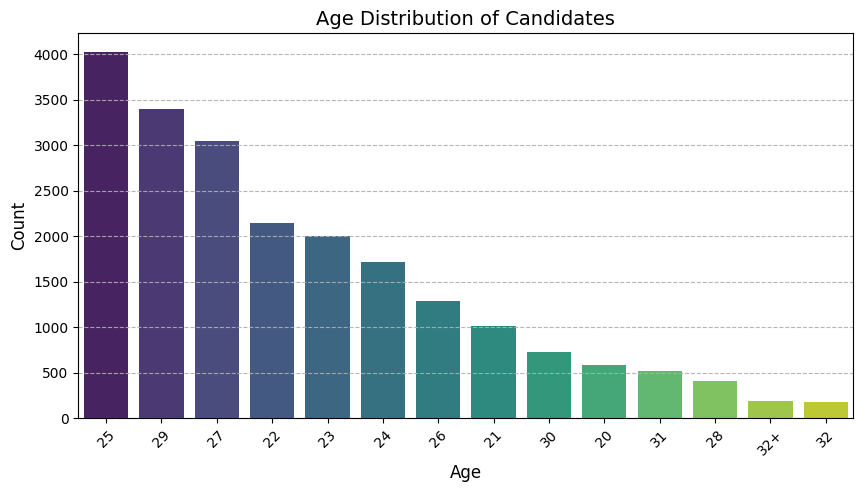

In [140]:
ages =df['age'].unique()
counts =df['age'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=ages, y=counts, palette="viridis")
# Labels & Title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution of Candidates", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.9)

# Show plot
plt.show()


In [141]:
df['pre_interview_check'].isna().sum()

0

In [142]:
df['pre_interview_check'].unique()

array(['Proceed with the Interview',
       'LLB / Regular degree pursuing / 12th Pass / Diploma', 'Option 4',
       'I', 'Given interview in 90days (for IS 60days)',
       'Rehire - Have worked with Byjus earlier', 'Poor Skillset Reject',
       'Age more than 32', 'Final Year Student',
       'Left the Interview in between due to poor intent only (not due to infra issue)',
       'IIT / IIM or Tier 1 college pass-out',
       'Language Issue (BEP CDT - Non-Hindi Speaking)',
       'Infra issues(says cannot arrange laptop)', 'Influencer Reject',
       'CDT do not wish to continue the interview for sales role'],
      dtype=object)

In [143]:
df['pre_interview_check'].value_counts()

pre_interview_check
Proceed with the Interview                                                        18706
LLB / Regular degree pursuing / 12th Pass / Diploma                                 499
Poor Skillset Reject                                                                429
Final Year Student                                                                  282
Language Issue (BEP CDT - Non-Hindi Speaking)                                       260
Left the Interview in between due to poor intent only (not due to infra issue)      213
Age more than 32                                                                    212
CDT do not wish to continue the interview for sales role                            159
Given interview in 90days (for IS 60days)                                           135
Rehire - Have worked with Byjus earlier                                             125
Infra issues(says cannot arrange laptop)                                            106
Influencer R

In [145]:
df['father_reply'].value_counts()

father_reply
None of the above                                                                                                        5945
Urgency using situation                                                                                                  4027
Urgency using Time                                                                                                       2986
Did not answer                                                                                                           1486
Asking Questions                                                                                                         1013
Urgency using Time, Urgency using situation                                                                               941
Urgency by creating counsellor Hype                                                                                       923
Urgency by creating counsellor Hype, Urgency using situation                                             

In [146]:
df['father_reply'].head(50)

0                                    Urgency using Time
1                                      Asking Questions
2                                    Urgency using Time
3           Urgency using Time, Urgency using situation
4                   Urgency by creating counsellor Hype
5                                        Did not answer
6                                    Urgency using Time
7                                     None of the above
8                                     None of the above
9                               Urgency using situation
10                              Urgency using situation
11                              Urgency using situation
12                    None of the above, Did not answer
13                                    None of the above
14                                       Did not answer
15                              Urgency using situation
16                              Urgency using situation
17                              Urgency using si